In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
test_dir = r"C:\Users\srini\OneDrive\Documents\6TH SEM\DSAI\project\Alzheimer_s Dataset\test"
train_dir = r"C:\Users\srini\OneDrive\Documents\6TH SEM\DSAI\project\Alzheimer_s Dataset\train"


In [4]:
data = []

In [5]:
for dirtrain in os.listdir(train_dir):
    print(dirtrain)
    for tr in os.listdir(os.path.join(train_dir, dirtrain)):
        img = cv2.imread(os.path.join(train_dir, dirtrain, tr))
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)
        data.append([img, dirtrain])


MildDemented
ModerateDemented
NonDemented
VeryMildDemented


In [6]:
for dirtest in os.listdir(test_dir):
    print(dirtest)
    for ts in os.listdir(os.path.join(test_dir, dirtest)):
        img = cv2.imread(os.path.join(test_dir, dirtest, ts))
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)
        data.append([img, dirtest])


MildDemented
ModerateDemented
NonDemented
pathToSave
VeryMildDemented


In [8]:
import random


In [9]:
# Shuffle data
random.seed(20)
random.shuffle(data)

# Split data into features and labels
x, y = zip(*data)
x = np.array(x)
y = np.array(y)
y = y.reshape(y.shape[0], 1)

# One-hot encode labels
enc = OneHotEncoder(handle_unknown='ignore').fit(y)
y = enc.transform(y).toarray()

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

# Model setup
model = Sequential([
    Conv2D(64, (4, 4), padding='same', activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (2, 2), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Dropout(0.3),

    Conv2D(256, (2, 2), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)         0

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
hist = model.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64, verbose=1, shuffle=True)

Epoch 1/200
64/64 [==============================] - 13s 181ms/step - loss: 2.1974 - accuracy: 0.4492 - val_loss: 1.1183 - val_accuracy: 0.5176
Epoch 2/200
64/64 [==============================] - 12s 182ms/step - loss: 1.0578 - accuracy: 0.4805 - val_loss: 1.1775 - val_accuracy: 0.5176
Epoch 3/200
64/64 [==============================] - 11s 177ms/step - loss: 1.0299 - accuracy: 0.4915 - val_loss: 1.0002 - val_accuracy: 0.5322
Epoch 4/200
64/64 [==============================] - 12s 185ms/step - loss: 0.9922 - accuracy: 0.5032 - val_loss: 0.9755 - val_accuracy: 0.5830
Epoch 5/200
64/64 [==============================] - 12s 195ms/step - loss: 0.9682 - accuracy: 0.5273 - val_loss: 0.9053 - val_accuracy: 0.5605
Epoch 6/200
64/64 [==============================] - 12s 193ms/step - loss: 0.9745 - accuracy: 0.5176 - val_loss: 1.0097 - val_accuracy: 0.5625
Epoch 7/200
64/64 [==============================] - 12s 194ms/step - loss: 0.9635 - accuracy: 0.5269 - val_loss: 0.9416 - val_accuracy:

64/64 [==============================] - 13s 200ms/step - loss: 0.5046 - accuracy: 0.7810 - val_loss: 0.4855 - val_accuracy: 0.7959
Epoch 58/200
64/64 [==============================] - 13s 203ms/step - loss: 0.4900 - accuracy: 0.7952 - val_loss: 0.5743 - val_accuracy: 0.7422
Epoch 59/200
64/64 [==============================] - 13s 200ms/step - loss: 0.4965 - accuracy: 0.7935 - val_loss: 0.4387 - val_accuracy: 0.8271
Epoch 60/200
64/64 [==============================] - 13s 199ms/step - loss: 0.4630 - accuracy: 0.8015 - val_loss: 0.4070 - val_accuracy: 0.8281
Epoch 61/200
64/64 [==============================] - 13s 205ms/step - loss: 0.4485 - accuracy: 0.8191 - val_loss: 0.4306 - val_accuracy: 0.8408
Epoch 62/200
64/64 [==============================] - 13s 201ms/step - loss: 0.4516 - accuracy: 0.8091 - val_loss: 0.4226 - val_accuracy: 0.8389
Epoch 63/200
64/64 [==============================] - 14s 221ms/step - loss: 0.4441 - accuracy: 0.8162 - val_loss: 0.5254 - val_accuracy: 0.778

64/64 [==============================] - 13s 200ms/step - loss: 0.1895 - accuracy: 0.9292 - val_loss: 0.2473 - val_accuracy: 0.9209
Epoch 114/200
64/64 [==============================] - 13s 200ms/step - loss: 0.1856 - accuracy: 0.9375 - val_loss: 0.2071 - val_accuracy: 0.9395
Epoch 115/200
64/64 [==============================] - 13s 198ms/step - loss: 0.1938 - accuracy: 0.9272 - val_loss: 0.2423 - val_accuracy: 0.9180
Epoch 116/200
64/64 [==============================] - 13s 199ms/step - loss: 0.1800 - accuracy: 0.9302 - val_loss: 0.2058 - val_accuracy: 0.9316
Epoch 117/200
64/64 [==============================] - 13s 198ms/step - loss: 0.1708 - accuracy: 0.9373 - val_loss: 0.2132 - val_accuracy: 0.9297
Epoch 118/200
64/64 [==============================] - 13s 201ms/step - loss: 0.1893 - accuracy: 0.9302 - val_loss: 0.1738 - val_accuracy: 0.9434
Epoch 119/200
64/64 [==============================] - 13s 198ms/step - loss: 0.1703 - accuracy: 0.9358 - val_loss: 0.1628 - val_accuracy:

64/64 [==============================] - 12s 193ms/step - loss: 0.1213 - accuracy: 0.9583 - val_loss: 0.1793 - val_accuracy: 0.9434
Epoch 170/200
64/64 [==============================] - 13s 197ms/step - loss: 0.1411 - accuracy: 0.9509 - val_loss: 0.1737 - val_accuracy: 0.9404
Epoch 171/200
64/64 [==============================] - 12s 194ms/step - loss: 0.1248 - accuracy: 0.9553 - val_loss: 0.1907 - val_accuracy: 0.9336
Epoch 172/200
64/64 [==============================] - 12s 194ms/step - loss: 0.1290 - accuracy: 0.9558 - val_loss: 0.1638 - val_accuracy: 0.9463
Epoch 173/200
64/64 [==============================] - 12s 192ms/step - loss: 0.1245 - accuracy: 0.9575 - val_loss: 0.1516 - val_accuracy: 0.9541
Epoch 174/200
64/64 [==============================] - 13s 197ms/step - loss: 0.1272 - accuracy: 0.9546 - val_loss: 0.1600 - val_accuracy: 0.9512
Epoch 175/200
64/64 [==============================] - 12s 194ms/step - loss: 0.1183 - accuracy: 0.9580 - val_loss: 0.1667 - val_accuracy:

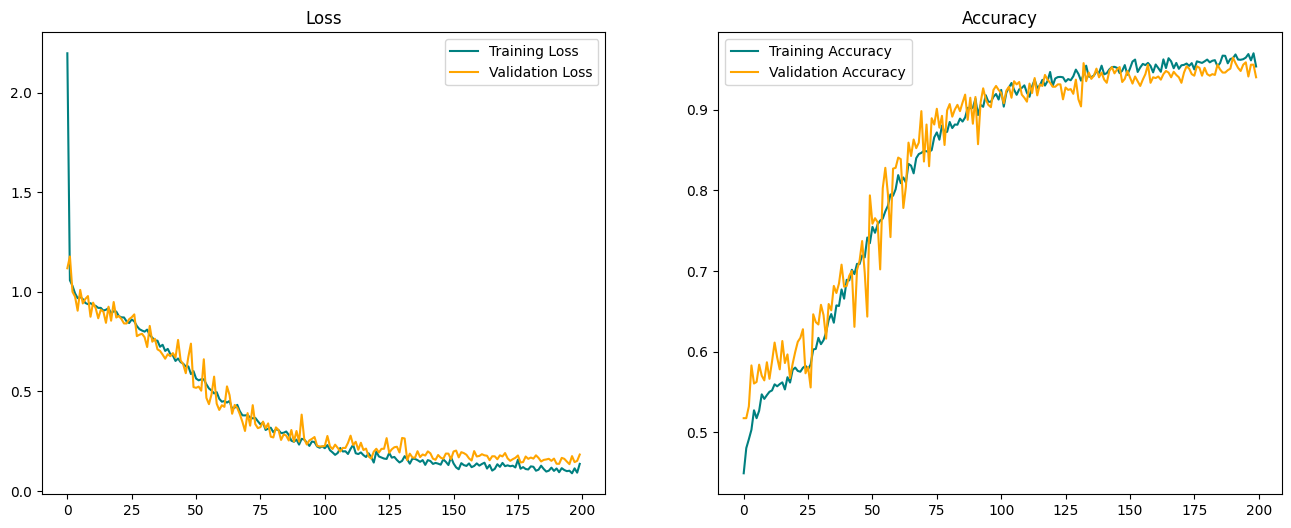

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
axes[0].plot(hist.history['loss'], color='teal', label='Training Loss')
axes[0].plot(hist.history['val_loss'], color='orange', label='Validation Loss')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(hist.history['accuracy'], color='teal', label='Training Accuracy')
axes[1].plot(hist.history['val_accuracy'], color='orange', label='Validation Accuracy')
axes[1].set_title('Accuracy')
axes[1].legend()

plt.show()

In [12]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {loss_and_metrics[0]}')
print(f'Test Accuracy: {loss_and_metrics[1]}')

40/40 - 1s - loss: 0.1990 - accuracy: 0.9289 - 1s/epoch - 29ms/step
Test Loss: 0.19901405274868011
Test Accuracy: 0.928906261920929


In [13]:
y_pred = model.predict(x_test).argmax(axis=1)
confusion_matrix = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred)
confusion_df = pd.DataFrame(confusion_matrix, columns=['0', '1', '2', '3'], index=['0', '1', '2', '3'])
print(confusion_df)


40/40 [==============================] - 1s 27ms/step
     0   1    2    3
0  155   0    4   19
1    0  13    0    0
2    3   0  600   54
3    4   1    6  421


In [15]:
model.save("alzheimer_model.h5")
